In [1]:
#import and manage data

import pandas as pd
file = pd.read_csv("tmplcctdvko.csv")       #read in files
file['City'] = file['City'].map(lambda x: x.upper())                                      #manage data
file['City'] = file['City'].replace(['DORCESTER'],'DORCHESTER')      
file['City'] = file['City'].replace(['E BOSTON'],'EAST BOSTON')                            
file['City'] = file['City'].replace(['S BOSTON'],'SOUTH BOSTON')                          
file['City'] = file['City'].replace(['JAMAICA PL'],'JAMAICA PLAIN')                       
file['City'] = file['City'].replace(['HYDE PARK\t\t\t'],'HYDE PARK')                      
file['DepartmentName'] = file['DepartmentName'].map(lambda x: str(x).upper())
file['DepartmentName'] = file['DepartmentName'].replace(['ARTS& CULTURE'],'ARTS&CULTURE') 
file['DepartmentName'] = file['DepartmentName'].replace(['PARK','?PARKS','PARKK','PARKS '],'PARKS')
file['DepartmentName'] = file['DepartmentName'].replace(['?DND'],'DND')
file['DepartmentName'] = file['DepartmentName'].replace([' PWD'],'PWD')
file['DepartmentName'] = file['DepartmentName'].replace(['COB','CITY OF BOSTON '],'CITY OF BOSTON')
file = file[file.DepartmentName != 'UNKNOWN']                                            #drop incomplete records from dataset
file = file[file.City != 'UNKNOWN']
file = file[file.DepartmentName != '']                                                   
file = file[file.City != '']
file = file[file.DepartmentName != 'PARCELS 03711002']
file['InvoiceDate'] = pd.to_datetime(file['InvoiceDate'])


file

,InvoiceID,AccountNumber,EnergyTypeName,InvoiceDate,FromDate,ToDate,UsagePeriodDays,DeliveryCost,SupplyCost,TotalCost,...,City,zip,StateName,Abbreviation,CountryName,SiteName,Currency,CodeDescription,DepartmentName,Last_Updated
0,7034904,25809001008,Electric,2015-12-21,2015-11-18 00:00:00,2015-12-18 00:00:00,30,37.06,24.64,61.70,...,BOSTON,2127,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2019-09-23 10:00:03
1,7057256,25954981004,Electric,2016-01-04,2015-12-01 00:00:00,2015-12-31 00:00:00,30,66.78,71.16,137.94,...,BOSTON,2110,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2019-09-23 10:00:03
2,9281829,26436411008,Electric,2017-06-19,2017-05-17 00:00:00,2017-06-16 00:00:00,30,11.62,37.91,49.53,...,BOSTON,2124,Massachusetts,MA,United States,Wilson,USD,Supply and Delivery Invoices,BPS,2019-09-23 10:00:03
3,11851823,26145081001,Electric,2018-06-06,2018-05-02 00:00:00,2018-06-05 00:00:00,34,40.69,24.61,65.30,...,BOSTON,2135,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2019-09-23 10:00:03
4,11849749,005136223170,Natural Gas,2018-05-08,2018-03-08 00:00:00,2018-04-09 00:00:00,32,672.68,0.00,672.68,...,BOSTON,2118,Massachusetts,MA,United States,South End Branch,USD,Delivery Invoice,BPL,2019-09-23 10:00:03
5,6780131,25954321003,Electric,2012-02-15,2012-01-18 00:00:00,2012-02-15 00:00:00,28,104.46,91.07,195.53,...,BOSTON,2108,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2019-09-23 10:00:03
6,13379958,25955411019,Electric,2019-08-01,2019-06-28 00:00:00,2019-07-31 00:00:00,33,46.63,0.00,46.63,...,BOSTON,2116,Massachusetts,MA,United States,Metered Streetlights,USD,Delivery Invoice,PWD,2019-09-23 10:00:03
7,13073346,005136429380-01335967,Natural Gas,2019-02-06,2018-11-30 00:00:00,2018-12-31 00:00:00,31,4047.11,0.00,4047.11,...,BOSTON,2128,Massachusetts,MA,United States,Blackstone,USD,Delivery Invoice,BPS,2019-09-23 10:00:03
8,6921694,26435461004,Electric,2016-06-17,2016-05-14 00:00:00,2016-06-14 00:00:00,31,173.91,390.73,564.64,...,BOSTON,2119,Massachusetts,MA,United States,Mason,USD,Supply and Delivery Invoices,BPS,2019-09-23 10:00:03
9,6779221,26435651000,Electric,2012-05-17,2012-04-18 00:00:00,2012-05-17 00:00:00,29,8.02,0.00,8.02,...,BOSTON,2119,Massachusetts,MA,United States,Metered Streetlights,USD,Delivery Invoice,PWD,2019-09-23 10:00:03


In [2]:
#organization 1:

Org1 = file.iloc[:,[3,10,22]]                                             #subset to obtain interested variables
Org1 = Org1.sort_values(['InvoiceDate','DepartmentName'])                 #multi indexing and sorting values
Org1 = Org1.groupby(['DepartmentName',Org1.InvoiceDate.dt.year]).sum()    #sum up the consumption by department and year
Org1 = Org1[Org1['TotalConsumption']>0]                                   #remove insignificant observations on consumption
Org1 = Org1.query('InvoiceDate > 2014')                                   #examine only recent entries

import numpy as np
import matplotlib.pyplot as plt
                                                 #print out a table to examine the consumption trend of each department by year
Org1 = Org1.unstack(level=0)                                  
print(Org1)
Org1.to_excel("Department-Year.xlsx")

                                                 #print out an image of the grpah for all departments over the years
Org1 = Org1.cumsum()
plt.figure()
Org1.plot()
plt.subplot(111).legend(loc='upper center',bbox_to_anchor=(1.7,0.7),ncol=2)
plt.subplot(111).set_ylabel('Total Consumption')
plt.title('Total Consumption By Year')
plt.savefig('Department-Year.jpg',dpi = 500,bbox_inches = 'tight', pad_inches = 1)


               TotalConsumption                                       \
DepartmentName     ARTS&CULTURE        BCYF         BFD          BPD   
InvoiceDate                                                            
2015                  558003.00  6024257.14  7332851.56  12976926.63   
2016                  510136.04  5740720.03  6903386.27  12885120.96   
2017                  390394.37  6740048.82  7119867.57  13384399.29   
2018                  504260.89  6949104.53  7194442.38  12527762.50   
2019                  217421.77  3956703.47  4660573.47   9200016.66   

                                                                 \
DepartmentName          BPL          BPS       BPSC         BTD   
InvoiceDate                                                       
2015            13841804.26  72981695.73  3290295.0  2792073.13   
2016            15711261.46  72702463.28  4432719.0  2472076.00   
2017            15792768.58  77302985.64  6486022.0  2444100.33   
2018            15827

C:\New App\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\New App\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


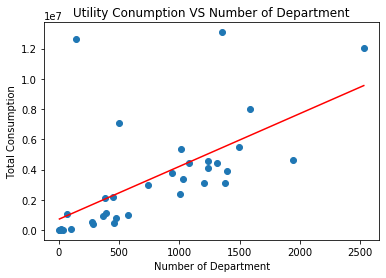

In [8]:
#organization 2:
import datetime

Org2 = file.iloc[:,[3,10,15,22]]                               #subset to obtain interested variables

Org2 = Org2[Org2.InvoiceDate > datetime.datetime(2019,1,1)]    #consider only entries made this year, control the time variable
Org2Total = Org2.groupby(['zip']).sum()                        #sum up total consumption by zipcodes
OrgDept = Org2.groupby(['zip'])['DepartmentName'].count()      #count the number of departments by zipcodes

Org2 = pd.concat([Org2Total,OrgDept],axis = 1).sort_values(by= 'TotalConsumption')  #produce 1 dataframe with zip, consumption and # of departments
Org2.to_excel('TotalConsumption-DepartmentName.xlsx')          #export the table as .xlsx

plt.scatter(Org2.iloc[:,1],Org2.iloc[:,0])                     #produce a visualization to check for significant linearity
plt.title("Utility Conumption VS Number of Department")
plt.xlabel("Number of Department")
plt.ylabel("Total Consumption")
plt.plot(np.unique(Org2.iloc[:,1]), np.poly1d(np.polyfit(Org2.iloc[:,1], Org2.iloc[:,0], 1))(np.unique(Org2.iloc[:,1])),'r')
plt.savefig('Consumption-NumDept.jpg',dpi = 500)


      TotalConsumption  DepartmentName
zip                                   
2203           1728.00               8
2188           2114.53               7
2446           7049.00              35
2169          19601.00              10
2467          54330.00              20
2199          64865.27              99
2210         406048.00             285
2215         432833.14             459
2113         513196.30             278
2110         764282.48             477
2109         952228.00             365
2114         964993.80             576
2171        1072015.60              66
2134        1149912.27             397
2108        2086310.66             388
2111        2200555.04             449
2131        2364133.76            1006
2126        2983893.18             738
2135        3078995.30            1375
2115        3082500.82            1202
2136        3383623.10            1031
2129        3778584.38             943
2130        3931347.93            1399
2132        4104192.55   

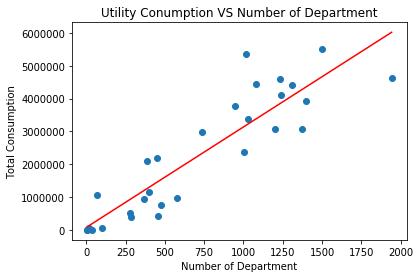

In [9]:
#from the graph, there likely to be 5 outliers which would significantly affect the analysis
#remove the highest 5 consumption records and reproduce the graph

Org2Clean = Org2.head(len(Org2)-5)
print(Org2Clean)
plt.scatter(Org2Clean.iloc[:,1],Org2Clean.iloc[:,0])              #produce a visualization to check for significant linearity
plt.title("Utility Conumption VS Number of Department")
plt.xlabel("Number of Department")
plt.ylabel("Total Consumption")
plt.plot(np.unique(Org2Clean.iloc[:,1]), np.poly1d(np.polyfit(Org2Clean.iloc[:,1], Org2Clean.iloc[:,0], 1))(np.unique(Org2Clean.iloc[:,1])),'r')
plt.savefig('Consumption-NumDeptClean.jpg',dpi = 500)


In [5]:
#to further explore the change in linearity, a function can be written and applied for R sqaured value
import math

def R2(x,y):
    Numer = len(x)*sum(x*y) - sum(x)*sum(y)
    Denom = (len(x)*sum(x**2)-(sum(x))**2)*(len(x)*sum(y**2)-(sum(y))**2)
    r     = Numer/math.sqrt(Denom)
    return math.sqrt(r)

print("Old R2: " + str(R2(Org2.iloc[:,1],Org2.iloc[:,0])))
print("New R2: " + str(R2(Org2Clean.iloc[:,1],Org2Clean.iloc[:,0])))
#removing the outliers improved significantly the R sqaured value between number of department in a given zipcode 
#and total consumption in that zipcode region.

Old R2: 0.7873370087623748
New R2: 0.9512125478606507


                          TotalConsumption
InvoiceDate City                          
2018        WALTHAM               19385.45
            HYDE PARK             17828.00
            W ROXBURY              7963.00
            SOUTH BOSTON           1365.00
            MATTAPAN                 24.00
2017        BRIGHTON              52932.00
            WALTHAM               17597.28
            HYDE PARK             16905.00
            ALLSTON               13163.00
            EAST BOSTON            5503.00
2016        BRIGHTON              46527.00
            WALTHAM               17351.14
            ALLSTON               15875.00
            HYDE PARK             13135.00
            EAST BOSTON            3802.00
2015        ROXBURY               38838.00
            BRIGHTON              30867.00
            WALTHAM               15589.20
            HYDE PARK             13707.00
            EAST BOSTON            3330.00
2014        BRIGHTON              36338.00
           

C:\New App\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


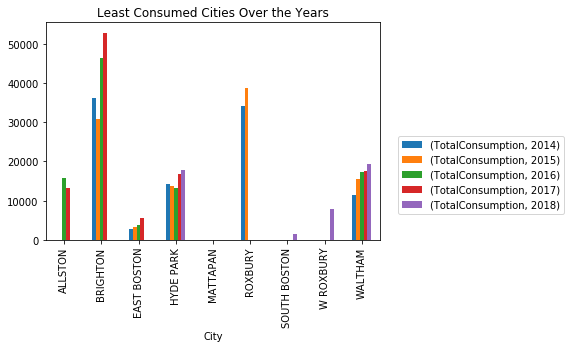

In [6]:
#organization 3:

Org3 = file.iloc[:,[3,10,14,22]]                                 #subset to obtain interested variables
Org3T= Org3.query('InvoiceDate>2014')                            #consider only recent years for possible relevant observations
Org3T= Org3T.groupby([Org3.InvoiceDate.dt.year,'City']).sum().sort_values(by = ['InvoiceDate','TotalConsumption'],ascending=False)

                                                            #groupby year and city, and compare the top consumption composition

Org3T= pd.concat([Org3T.query('InvoiceDate == 2018').tail(),Org3T.query('InvoiceDate == 2017').tail(),
                  Org3T.query('InvoiceDate == 2016').tail(),Org3T.query('InvoiceDate == 2015').tail(),
                  Org3T.query('InvoiceDate == 2014').tail()])

print(Org3T)
Org3T.unstack(level=0).plot(kind='bar')
plt.subplot(111).legend(loc='upper center',bbox_to_anchor=(1.3,0.5),ncol=1)
plt.title('Least Consumed Cities Over the Years')
plt.savefig('BTMnYEARS.jpg',dpi = 500,bbox_inches = 'tight', pad_inches = 0.5)


             TotalConsumption
InvoiceDate                  
2014             1.899714e+08
2015             1.832276e+08
2016             1.910390e+08
2017             1.950580e+08
2018             1.949402e+08
             TotalConsumption
InvoiceDate                  
2014                 98934.94
2015                102331.20
2016                 96690.14
2017                106100.28
2018                 46565.45


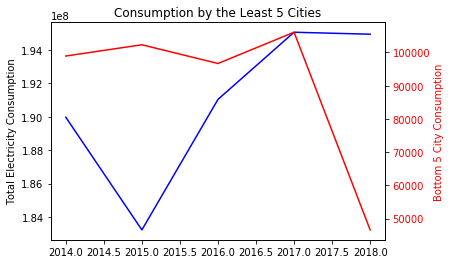

In [7]:
Total = Org3.groupby([Org3.InvoiceDate.dt.year]).sum()[-6:-1]
BTM = Org3T.groupby(['InvoiceDate']).sum()

print(Total)
print(BTM)
x =[2014,2015,2016,2017,2018]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,Total,'b')
ax1.set_ylabel('Total Electricity Consumption')

ax2 = ax1.twinx()
ax2.plot(x,BTM,'r')
ax2.set_ylabel('Bottom 5 City Consumption',color='r')
for i in ax2.get_yticklabels():i.set_color('r')
plt.title('Consumption by the Least 5 Cities')
plt.savefig('Compare.jpg',dpi = 500)